In [1]:
1 + 1

2

# About Pandas
This is Markdown cell.

Automatické doplnění = TAB

In [2]:
import pandas

In [3]:
# Get documentation of read_csv method
pandas.read_csv?

In [4]:
actors = pandas.read_csv("actors.csv", index_col=None)
spouses = pandas.read_csv("spouses.csv", sep=";")
actors

,name,birth,alive
0,Terry,1942,True
1,Michael,1943,True
2,Eric,1943,True
3,Graham,1941,False
4,Terry,1940,True
5,John,1939,True


In [5]:
spouses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
name           11 non-null object
birth          11 non-null int64
spouse_name    11 non-null object
dtypes: int64(1), object(2)
memory usage: 392.0+ bytes


In [6]:
# Získání sloupce jako pohled na data. Při složitějších operacích se vytvoří kopie
birth_years = actors["birth"]
birth_years

0    1942
1    1943
2    1943
3    1941
4    1940
5    1939
Name: birth, dtype: int64

In [7]:
# Více sloupců
actors[["name", "alive"]]

,name,alive
0,Terry,True
1,Michael,True
2,Eric,True
3,Graham,False
4,Terry,True
5,John,True


# Využití sloupců

In [8]:
ages = 2019 - birth_years
ages

0    77
1    76
2    76
3    78
4    79
5    80
Name: birth, dtype: int64

In [9]:
centuries = birth_years // 100 + 1
centuries

0    20
1    20
2    20
3    20
4    20
5    20
Name: birth, dtype: int64

In [10]:
birth_years > 1940

0     True
1     True
2     True
3     True
4    False
5    False
Name: birth, dtype: bool

## Úprava dat

In [11]:
actors["name"] + [" (1)", " (2)", " (3)", " (4)", " (5)", " (6)"]

0      Terry (1)
1    Michael (2)
2       Eric (3)
3     Graham (4)
4      Terry (5)
5       John (6)
Name: name, dtype: object

In [12]:
# Pod namespace str jsou všechny string metody.
actors["name"].str.upper()

0      TERRY
1    MICHAEL
2       ERIC
3     GRAHAM
4      TERRY
5       JOHN
Name: name, dtype: object

In [13]:
actors["birth"].astype(str).str

In [14]:
birth_years[2:-1]

2    1943
3    1941
4    1940
Name: birth, dtype: int64

In [15]:
# Výběr dat dle masky
birth_years[birth_years > 1940]

0    1942
1    1943
2    1943
3    1941
Name: birth, dtype: int64

In [16]:
# And, Or
birth_years[(birth_years < 1940) | (birth_years > 1940)]

0    1942
1    1943
2    1943
3    1941
5    1939
Name: birth, dtype: int64

### Použití metody apply

In [17]:
actors["name"].apply(lambda x: "".join(reversed(x)))

0      yrreT
1    leahciM
2       cirE
3     maharG
4      yrreT
5       nhoJ
Name: name, dtype: object

In [18]:
actors["alive"].apply({True: "alive", False: "dead"}.get)

0    alive
1    alive
2    alive
3     dead
4    alive
5    alive
Name: alive, dtype: object

## Indexery

### Výběr řádků podle jména

In [19]:
actors

,name,birth,alive
0,Terry,1942,True
1,Michael,1943,True
2,Eric,1943,True
3,Graham,1941,False
4,Terry,1940,True
5,John,1939,True


In [20]:
actors.loc[2:4]

,name,birth,alive
2,Eric,1943,True
3,Graham,1941,False
4,Terry,1940,True


In [21]:
# Výběr celé tabulky, omezen na tyto sloupce
actors.loc[:, "birth":"alive"]

,birth,alive
0,1942,True
1,1943,True
2,1943,True
3,1941,False
4,1940,True
5,1939,True


In [22]:
actors.loc[2:4, ["birth", "alive", "name", "birth"]]

,birth,alive,name,birth
2,1943,True,Eric,1943
3,1941,False,Graham,1941
4,1940,True,Terry,1940


### Výběr řádků podle indexu

In [23]:
actors.iloc[2:4]

,name,birth,alive
2,Eric,1943,True
3,Graham,1941,False


In [24]:
# Čárka odděluje indexy řádků a sloupců
actors.iloc[2:4, 0:2]

,name,birth
2,Eric,1943
3,Graham,1941


### Výběr řádků podle jména i indexu

In [25]:
actors.iloc[2].loc["name"]

'Eric'

### Manipulace s indexy

In [26]:
indexed_actors = actors.set_index(["name", "birth"])
indexed_actors

,,alive
name,birth,
Terry,1942,True
Michael,1943,True
Eric,1943,True
Graham,1941,False
Terry,1940,True
John,1939,True


In [27]:
indexed_actors.loc["Terry"]

,alive
birth,
1942,True
1940,True


In [28]:
indexed_actors.loc[("Terry", 1940)]

alive    True
Name: (Terry, 1940), dtype: bool

## Vložení sloupců do tabulek

In [29]:
# Vkládání podle indexů
last_names = pandas.Series(
    ["Gil", "Jones", "Cleveland"],
    index=[("Terry", 1940), ("Terry", 1942), ("Carol", 1942)]
)

indexed_actors["last_name"] = last_names
indexed_actors

,,alive,last_name
name,birth,,
Terry,1942,True,Jones
Michael,1943,True,NaN
Eric,1943,True,NaN
Graham,1941,False,NaN
Terry,1940,True,Gil
John,1939,True,NaN


In [30]:
indexed_actors["some_num"] = [1, 2, 3, 4, 5, 6]
indexed_actors

,,alive,last_name,some_num
name,birth,,,
Terry,1942,True,Jones,1
Michael,1943,True,NaN,2
Eric,1943,True,NaN,3
Graham,1941,False,NaN,4
Terry,1940,True,Gil,5
John,1939,True,NaN,6


## Práce s NaN

In [31]:
# Výměna NaN za "---"
indexed_actors.fillna("---")

,,alive,last_name,some_num
name,birth,,,
Terry,1942,True,Jones,1
Michael,1943,True,---,2
Eric,1943,True,---,3
Graham,1941,False,---,4
Terry,1940,True,Gil,5
John,1939,True,---,6


In [33]:
# Zruší všechny řádky, ve kterých je None
indexed_actors.dropna()

alive last_name  some_num
name  birth                           
Terry 1942    True     Jones         1
      1940    True       Gil         5

## Spojování tabulek

In [35]:
actors

,name,birth,alive
0,Terry,1942,True
1,Michael,1943,True
2,Eric,1943,True
3,Graham,1941,False
4,Terry,1940,True
5,John,1939,True


In [36]:
spouses

,name,birth,spouse_name
0,Graham,1941,David Sherlock
1,John,1939,Connie Booth
2,John,1939,Barbara Trentham
3,John,1939,Alyce Eichelberger
4,John,1939,Jennifer Wade
5,Terry,1940,Maggie Westo
6,Eric,1943,Lyn Ashley
7,Eric,1943,Tania Kosevich
8,Terry,1942,Alison Telfer
9,Terry,1942,Anna Söderström


In [34]:
# Spojuje podle sloupců
actors.merge(spouses)

,name,birth,alive,spouse_name
0,Terry,1942,True,Alison Telfer
1,Terry,1942,True,Anna Söderström
2,Michael,1943,True,Helen Gibbins
3,Eric,1943,True,Lyn Ashley
4,Eric,1943,True,Tania Kosevich
5,Graham,1941,False,David Sherlock
6,Terry,1940,True,Maggie Westo
7,John,1939,True,Connie Booth
8,John,1939,True,Barbara Trentham
9,John,1939,True,Alyce Eichelberger


In [37]:
# Spojuje podle indexů, které musí být kompatibilní
actors.join?

# Práce s více daty

In [38]:
import itertools
import random
random.seed(0)

months = pandas.date_range('2015-01', '2016-12', freq='M')
categories = ['Electronics', 'Power Tools', 'Clothing']
data = pandas.DataFrame([{'month': a, 'category': b, 'sales': random.randint(-1000, 10000)}
                          for a, b in itertools.product(months, categories)
                          if random.randrange(20) > 0])

In [39]:
data

,month,category,sales
0,2015-01-31,Electronics,5890
1,2015-01-31,Power Tools,3242
2,2015-01-31,Clothing,6961
3,2015-02-28,Electronics,3969
4,2015-02-28,Power Tools,4866
...,...,...,...
62,2016-10-31,Power Tools,5095
63,2016-10-31,Clothing,4448
64,2016-11-30,Electronics,18
65,2016-11-30,Power Tools,1397


In [41]:
# Počet řádků
len(data)

67

In [42]:
# Statistická analýza číselných sloupců
data.describe()

,sales
count,67.000000
mean,4795.552239
std,3101.026552
min,-735.000000
25%,2089.000000
50%,4448.000000
75%,7874.000000
max,9817.000000


In [43]:
data.index

RangeIndex(start=0, stop=67, step=1)

In [50]:
index_data = data.set_index(["category", "month"])
index_data.head(n=9)

,,sales
category,month,
Electronics,2015-01-31,5890
Power Tools,2015-01-31,3242
Clothing,2015-01-31,6961
Electronics,2015-02-28,3969
Power Tools,2015-02-28,4866
Clothing,2015-02-28,2578
Electronics,2015-03-31,1281
Power Tools,2015-03-31,1289
Clothing,2015-03-31,9131


In [55]:
# Vezme jeden ze řádků z vícerozměrného indexu a použije ho jako sloupec
unstacked = index_data.unstack()
unstacked

sales                                                         \
month       2015-01-31 2015-02-28 2015-03-31 2015-04-30 2015-05-31 2015-06-30   
category                                                                        
Clothing        6961.0     2578.0     9131.0      618.0     4796.0     8052.0   
Electronics     5890.0     3969.0     1281.0     7725.0     4409.0     4180.0   
Power Tools     3242.0     4866.0     1289.0     1407.0     8171.0     9492.0   

                                                         ...             \
month       2015-07-31 2015-08-31 2015-09-30 2015-10-31  ... 2016-02-29   
category                                                 ...              
Clothing        7989.0        NaN       31.0     7896.0  ...     4194.0   
Electronics     6253.0        NaN     7086.0     8298.0  ...     6290.0   
Power Tools     3267.0     5534.0     2996.0     2909.0  ...     8769.0   

                                                                               \
month       2016-03-31 2016-04-30 2016-05-31 2016-06-30 2016-07-31 2016-08-31   
category                                                                        
Clothing        2059.0      471.0     5410.0     8663.0     9817.0     6969.0   
Electronics     2966.0     9039.0     1450.0     3515.0     8497.0      349.0   
Power Tools     2012.0     6807.0      314.0     2858.0     6382.0     9039.0   

                                              
month       2016-09-30 2016-10-31 2016-11-30  
category                                      
Clothing        -735.0     4448.0     -259.0  
Electronics     9324.0      919.0       18.0  
Power Tools     2119.0     5095.0     1397.0  

[3 rows x 23 columns]

In [56]:
# Toto mění tabulku
unstacked.columns = unstacked.columns.droplevel()
unstacked

month,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,...,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30
category,,,,,,,,,,,,,,,,,,,,,
Clothing,6961.0,2578.0,9131.0,618.0,4796.0,8052.0,7989.0,NaN,31.0,7896.0,...,4194.0,2059.0,471.0,5410.0,8663.0,9817.0,6969.0,-735.0,4448.0,-259.0
Electronics,5890.0,3969.0,1281.0,7725.0,4409.0,4180.0,6253.0,NaN,7086.0,8298.0,...,6290.0,2966.0,9039.0,1450.0,3515.0,8497.0,349.0,9324.0,919.0,18.0
Power Tools,3242.0,4866.0,1289.0,1407.0,8171.0,9492.0,3267.0,5534.0,2996.0,2909.0,...,8769.0,2012.0,6807.0,314.0,2858.0,6382.0,9039.0,2119.0,5095.0,1397.0


In [57]:
unstacked.loc["Electronics"].sum()

103742.0

In [61]:
unstacked.loc[["Electronics", "Clothing"], "2016-03":"2016-10"].sum()

month
2016-03-31     5025.0
2016-04-30     9510.0
2016-05-31     6860.0
2016-06-30    12178.0
2016-07-31    18314.0
2016-08-31     7318.0
2016-09-30     8589.0
2016-10-31     5367.0
dtype: float64

In [63]:
stacked = unstacked.stack()
stacked

category     month     
Clothing     2015-01-31    6961.0
             2015-02-28    2578.0
             2015-03-31    9131.0
             2015-04-30     618.0
             2015-05-31    4796.0
                            ...  
Power Tools  2016-07-31    6382.0
             2016-08-31    9039.0
             2016-09-30    2119.0
             2016-10-31    5095.0
             2016-11-30    1397.0
Length: 67, dtype: float64

# Matplotlib

In [68]:
import matplotlib

# Umožňuje okamžité zobrazení grafů
%matplotlib inline

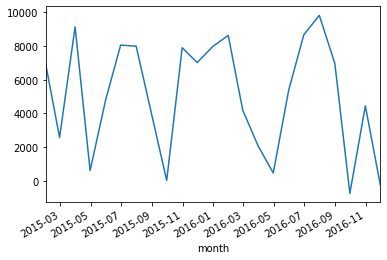

In [80]:
plot = unstacked.loc["Clothing"].dropna().plot();

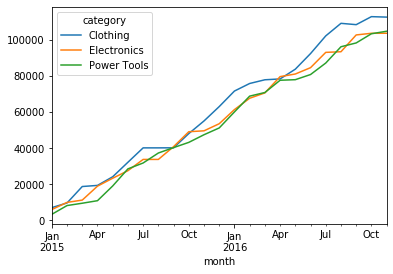

In [85]:
# T = transpose
unstacked.T.fillna(0).cumsum().plot()

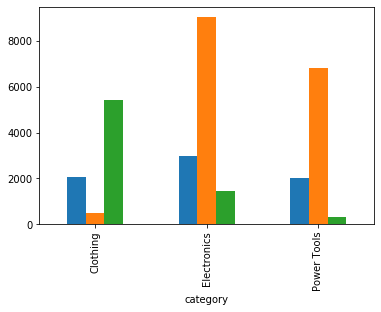

In [86]:
unstacked.loc[:, '2016-03':'2016-05'].plot.bar(legend=False)

# Grupování

In [92]:
data.groupby("category").count()

,month,sales
category,,
Clothing,22,22
Electronics,22,22
Power Tools,23,23


In [93]:
data.groupby("category").agg(["mean", "median", sum, pandas.Series.kurtosis])

sales                          
                    mean  median     sum      kurt
category                                          
Clothing     5122.772727  6185.5  112701 -1.298035
Electronics  4715.545455  4294.5  103742 -1.353210
Power Tools  4559.086957  3769.0  104859 -1.044767

In [105]:
bin_size = 10000
by_month = data.groupby("month").sum()
by_month.groupby(by_month["sales"] // bin_size * bin_size).agg(["count", "sum"])

sales        
      count     sum
sales              
0         5   30651
10000    15  218870
20000     3   71781

In [106]:
by_month

,sales
month,
2015-01-31,16093
2015-02-28,11413
2015-03-31,11701
2015-04-30,9750
2015-05-31,17376
2015-06-30,21724
2015-07-31,17509
2015-08-31,5534
2015-09-30,10113
